In [ ]:
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

In [ ]:
# ! pip install nlu pyspark==3.0.1

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash

--2021-11-29 02:14:42--  https://setup.johnsnowlabs.com/nlu/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh [following]
--2021-11-29 02:14:43--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1662 (1.6K) [text/plain]
Saving to: ‘STDOUT’

Installing  NLU 3.3.0 with  PySpark 3.1.2 and Spark NLP 3.3.1 for Google Colab ...
-                   100%[===================>]   1.62K  --.-KB/s    in 0s      

In [ ]:
import nlu
pipe = nlu.load('emotion')

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


In [ ]:
import pandas as pd
df1 = pd.read_csv('Reddit_covid_threads.csv')
df2 = pd.read_csv('Twitter_covid_tweets.csv')
df3 = pd.read_csv('Youtube_covid_comments.csv')

reddit_texts = pd.DataFrame()
reddit_texts['text'] = df1['Text']

# Identify sentiments in threads
i = 0
reddit_emotions = []
while i < len(reddit_texts) - 250: 
  reddit_emotions.extend(pipe.predict(reddit_texts.iloc[i:i+250], output_level='document')['emotion'])
  i += 250


In [ ]:
if i<len(reddit_texts):
  reddit_emotions.extend(pipe.predict(reddit_texts.iloc[i:len(reddit_texts)], output_level='document')['emotion'])
df1['Emotion'] = reddit_emotions
print(df1)

                Created_at              User_ID  ... Category   Emotion
0      2020-02-19 01:36:55           TeRiYaki32  ...       11      fear
1      2020-02-19 01:37:13           TeRiYaki32  ...       15      fear
2      2020-02-19 02:10:57        Prayers4Wuhan  ...       19      fear
3      2020-02-19 08:29:12                loot6  ...        5      fear
4      2020-02-19 10:16:32           Sefton2020  ...       18      fear
...                    ...                  ...  ...      ...       ...
84949  2021-11-25 00:42:00  throwaway3772917422  ...       17      fear
84950  2021-11-25 02:31:40          evilplushie  ...       19      fear
84951  2021-11-25 13:12:06        Ivehadlettuce  ...       13      fear
84952  2021-11-25 16:40:05      MembraneAnomaly  ...       15      fear
84953  2021-11-25 19:14:47          SpecialPea8  ...       13  surprise

[84954 rows x 5 columns]


In [ ]:
from google.colab import files

#Save updated dataframes to files
df1.to_csv('Reddit_covid_threads.csv', index=False)
files.download('Reddit_covid_threads.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
twitter_texts = pd.DataFrame()
twitter_texts['text'] = df2['Text']

# Identify sentiments in threads
i = 0
twitter_emotions = []
while i < len(twitter_texts) - 250: 
  twitter_emotions.extend(pipe.predict(twitter_texts.iloc[i:i+250], output_level='document')['emotion'])
  i += 250

if i < len(twitter_texts):
  twitter_emotions.extend(pipe.predict(twitter_texts.iloc[i:len(twitter_texts)], output_level='document')['emotion'])
df2['Emotion'] = twitter_emotions
print(df2)

                Created_at       User_ID  ... Category   Emotion
0      2021-10-20 16:19:28  1.384310e+18  ...       10      fear
1      2021-10-20 16:19:28  1.069250e+18  ...       13      fear
2      2021-10-20 16:19:32  2.511069e+08  ...       13      fear
3      2021-10-20 16:19:33  1.233376e+08  ...        5      fear
4      2021-10-20 16:19:33  5.459926e+08  ...       19      fear
...                    ...           ...  ...      ...       ...
29348  2021-11-27 06:42:00  1.454399e+18  ...       11      fear
29349  2021-11-27 06:42:03  1.918924e+09  ...        6  surprise
29350  2021-11-27 06:42:25  1.928808e+09  ...       19      fear
29351  2021-11-27 06:42:29  1.113906e+18  ...        0      fear
29352  2021-11-27 06:42:39  1.113906e+18  ...       18      fear

[29353 rows x 5 columns]


In [ ]:
#Save updated dataframes to files
df2.to_csv('Twitter_covid_tweets.csv', index=False)
files.download('Twitter_covid_tweets.csv')

In [ ]:
youtube_texts = pd.DataFrame()
youtube_texts['text'] = df3['Text']

# Identify sentiments in threads
i = 0
youtube_emotions = []
while i < len(youtube_texts) - 250: 
  youtube_emotions.extend(pipe.predict(youtube_texts.iloc[i:i+250], output_level='document')['emotion'])
  i += 250

if i < len(youtube_texts):
  youtube_emotions.extend(pipe.predict(youtube_texts.iloc[i:len(youtube_texts)], output_level='document')['emotion'])
df3['Emotion'] = youtube_emotions
print(df3)

In [ ]:
#Save updated dataframes to files
df3.to_csv('Youtube_covid_comments.csv', index=False)
files.download('Youtube_covid_comments.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter

import datetime

df2.Created_at = [datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S') for date_time_str in df2.Created_at]
twitter_df = pd.DataFrame({'Timestamp': df2.Created_at, 'Emotion': df2.Emotion})
twitter_df['Date'] = twitter_df['Timestamp'].apply(lambda x: "%d/%d/%d" % (x.month, x.day, x.year))
print(twitter_df)

                Timestamp   Emotion        Date
0     2021-10-20 16:19:28      fear  10/20/2021
1     2021-10-20 16:19:28      fear  10/20/2021
2     2021-10-20 16:19:32      fear  10/20/2021
3     2021-10-20 16:19:33      fear  10/20/2021
4     2021-10-20 16:19:33      fear  10/20/2021
...                   ...       ...         ...
29348 2021-11-27 06:42:00      fear  11/27/2021
29349 2021-11-27 06:42:03  surprise  11/27/2021
29350 2021-11-27 06:42:25      fear  11/27/2021
29351 2021-11-27 06:42:29      fear  11/27/2021
29352 2021-11-27 06:42:39      fear  11/27/2021

[29353 rows x 3 columns]


In [ ]:
twitter_df = twitter_df.groupby(['Date', 'Emotion']).size().to_frame('Count').reset_index()
print(twitter_df)

In [ ]:
twiter_df = twitter_df.sort_values(by="Date", key=pd.to_datetime).reset_index()
print(twitter_df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text major ticklabel objects>)

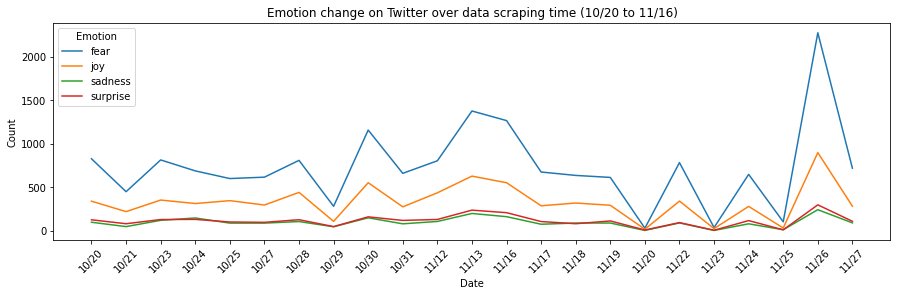

In [ ]:
twitter_df['Date'] = [string[:-5] for string in twitter_df['Date']]
plt.figure(figsize=(15,4))
plt.title("Emotion change on Twitter over data scraping time (10/20 to 11/16)")
sns.lineplot('Date', 'Count', hue='Emotion', data=twitter_df)
plt.xticks(rotation=45)

In [ ]:
df3.Created_at = [datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S') for date_time_str in df3.Created_at]
youtube_df = pd.DataFrame({'Timestamp': df3.Created_at, 'Emotion': df3.Emotion})
youtube_df['Date'] = youtube_df['Timestamp'].apply(lambda x: "%d/%d/%d" % (x.month, x.day, x.year))
print(youtube_df)

                Timestamp  Emotion        Date
0     2021-10-22 00:11:46     fear  10/22/2021
1     2021-10-22 00:58:55      joy  10/22/2021
2     2021-10-22 00:57:57     fear  10/22/2021
3     2021-10-22 00:57:07     fear  10/22/2021
4     2021-10-22 00:55:15      joy  10/22/2021
...                   ...      ...         ...
39543 2021-11-24 17:08:52  sadness  11/24/2021
39544 2021-11-24 16:32:23      joy  11/24/2021
39545 2021-11-24 16:12:31     fear  11/24/2021
39546 2021-11-24 16:05:27     fear  11/24/2021
39547 2021-11-24 18:47:07      joy  11/24/2021

[39548 rows x 3 columns]


In [ ]:
youtube_df = youtube_df.groupby(['Date', 'Emotion']).size().to_frame('Count').reset_index()
youtube_df = youtube_df.sort_values(by="Date", key=pd.to_datetime).reset_index()
print(youtube_df)

     index        Date   Emotion  Count
0      277    4/7/2020       joy      3
1      280    4/9/2020       joy      1
2      240   4/10/2020       joy      1
3      241   4/11/2020       joy      1
4      255   4/18/2020  surprise      1
..     ...         ...       ...    ...
588    190  11/26/2021  surprise    390
589    194  11/27/2021  surprise    168
590    191  11/27/2021      fear    765
591    192  11/27/2021       joy    184
592    193  11/27/2021   sadness    156

[593 rows x 4 columns]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 <a list of 42 Text major ticklabel objects>)

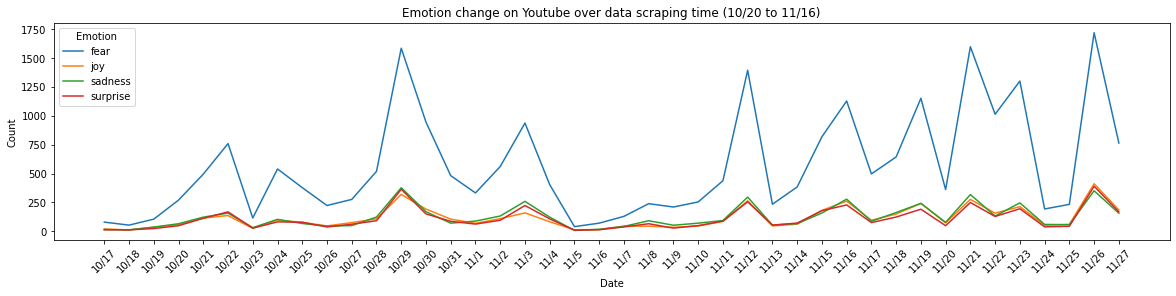

In [ ]:
youtube_df1 = youtube_df[425:]
youtube_df1['Date'] = [string[:-5] for string in youtube_df1['Date']]
plt.figure(figsize=(20,4))
plt.title("Emotion change on Youtube over data scraping time (10/20 to 11/16)")
sns.lineplot('Date', 'Count', hue='Emotion', data=youtube_df1)
plt.xticks(rotation=45)

In [ ]:
reddit_texts = pd.DataFrame()
# df1 = pd.read_csv("Reddit_covid_threads.csv")
df1.Created_at = [datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S') for date_time_str in df1.Created_at]
reddit_df = pd.DataFrame({'Timestamp': df1.Created_at, 'Emotion': df1.Emotion})
reddit_df['Date'] = reddit_df['Timestamp'].apply(lambda x: "%d/%d/%d" % (x.month, x.day, x.year))
print(reddit_df)

                Timestamp   Emotion        Date
0     2020-02-19 01:36:55      fear   2/19/2020
1     2020-02-19 01:37:13      fear   2/19/2020
2     2020-02-19 02:10:57      fear   2/19/2020
3     2020-02-19 08:29:12      fear   2/19/2020
4     2020-02-19 10:16:32      fear   2/19/2020
...                   ...       ...         ...
84949 2021-11-25 00:42:00      fear  11/25/2021
84950 2021-11-25 02:31:40      fear  11/25/2021
84951 2021-11-25 13:12:06      fear  11/25/2021
84952 2021-11-25 16:40:05      fear  11/25/2021
84953 2021-11-25 19:14:47  surprise  11/25/2021

[84954 rows x 3 columns]


In [ ]:
reddit_df = reddit_df.groupby(['Date', 'Emotion']).size().to_frame('Count').reset_index()
reddit_df = reddit_df.sort_values(by="Date", key=pd.to_datetime).reset_index()
print(reddit_df)

     index        Date   Emotion  Count
0      293   2/19/2020      fear      6
1      294   2/19/2020       joy      1
2      295   2/20/2020      fear      1
3      299   2/24/2020      fear      1
4      301   2/26/2020      fear      2
..     ...         ...       ...    ...
686    232  11/26/2021      fear   2623
687    237  11/27/2021       joy    295
688    238  11/27/2021   sadness    204
689    239  11/27/2021  surprise    145
690    236  11/27/2021      fear    794

[691 rows x 4 columns]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41],
 <a list of 42 Text major ticklabel objects>)

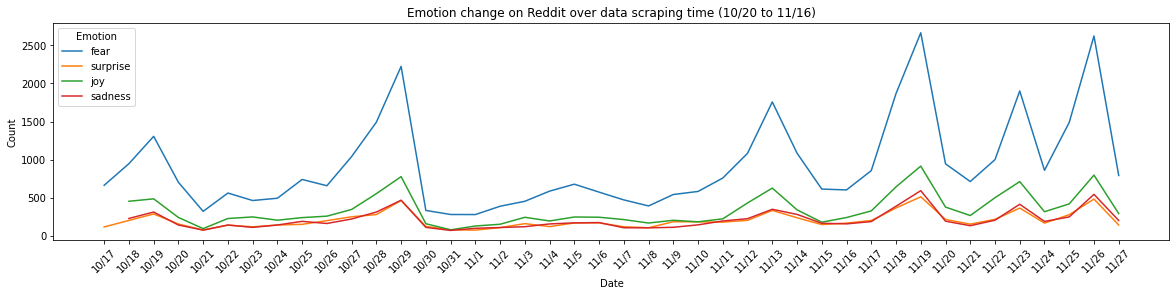

In [ ]:
reddit_df1 = reddit_df[525:]
reddit_df1['Date'] = [string[:-5] for string in reddit_df1['Date']]
plt.figure(figsize=(20,4))
plt.title("Emotion change on Reddit over data scraping time (10/20 to 11/16)")
sns.lineplot('Date', 'Count', hue='Emotion', data=reddit_df1)
plt.xticks(rotation=45)